### 写在最前面：
>1. ###### 不知不觉逛社区快半年了，通过优矿平台认识了很多大牛，真心获益匪浅，不管是编程方面还是金融方面，在此真心感谢优矿平台，为你们的分享精神点个赞！
>2. ###### 再来说说写作目的吧，估计自己还算是个社区活跃用户，之前也分享过一些实用的帖子，然后某一天系统就发通知说感谢我对优矿的支持，内存已经帮我加到1GB，有效期1个月，从此妈妈再也不用担心我跑策略out of memory了，嘿嘿~所以呢，一方面传承优矿分享交流精神，另一方面也希望通过多为社区做贡献获得1GB内存更长时间，来个永久版最好啦！

### 本篇缘由：
>1. ###### 最近市场的起起伏伏真是惊心动被迫，股指期货投机交易也被狠狠的限制了，各种公募私募产品清盘处理。。。
>2. ###### 我开始思考，是市场的问题还是投资者的问题，究竟怎样的策略才能成为常胜将军，如果可以选择，我宁可做市场上的寿星而不是明星。
>3. ###### 优矿给了我这个启示，感谢社区大牛**`薛昆Kelvin`**的帖子[`量化分析师的Python日志第14天`](https://uqer.io/community/share/55e662f9f9f06c1ea481f9cf)，告诉我该如何去做Alpha对冲策略
>4. ###### 如果你读到这里，强烈建议你先去认真读完上述帖子，然后接着往下看。
>5. ###### 上述帖子，对Alpha对冲策略从理论原理再到代码实现都进行了详细的讲解，但是对于其中提到的一些新的函数（而且是特别重要的函数讲述的不是特别清楚，只是说了一下大体方向），于是乎，笔者就顺藤摸瓜，探探究竟。本篇就是讲述自己对上述帖子的一些测试和自我体会，当然也秉承分享精神，展示笔者得意的Fama-french三因子策略。。。老舍不得的了，**`一定要给我加内存啊！！`**

### 关于本篇：
>1. ###### 本篇首先对帖子中出现的不太清晰的函数进行相关猜测与测试，包括因子信号处理函数:去极值（winsorize）、中性化（neutralize）、标准化（standardize）
>2. ###### 随后，对组合构建函数simple_long_only进行猜测
>3. ###### 最后，以Fama-French三因子构建策略进行回测展示

#### 首先来看三个因子处理函数，笔者结合各家券商研究报告中提到的类似处理进行大胆猜测，并进行测试
     >  首先是去极值函数winsorize，大量券商研究报告都提到了这个方法，业内常用所谓的“3$\sigma$”原则，也就是先根据因子样本计算出标准差，然后将其中大于 u+3$\sigma$ 的置换为u+3$\sigma$，将小于u-3$\sigma$ 的置换为u-3$\sigma$，这样做的好处是可以消除因子极值对因子实际效果造成的不必要影响，下面举例来说明

#### Tips：读者可以首先在code模式下输入 `winsorize? ` 然后运行便可以得到该函数的说明文档。

In [ ]:
import numpy as np
import pandas as pd

universe = set_universe('SH50')  # 以上证50市盈率因子进行说明
data = DataAPI.MktStockFactorsOneDayGet(tradeDate='20150916', secID=universe, field='ticker,PE',pandas='1').set_index('ticker')
data = data['PE'].to_dict()  # winsorize之前数据
new_data = winsorize(data)  # winsorize之后数据
df = pd.DataFrame(data=0, index=map(lambda x: x[:6], universe), columns=['before winsorize','after winsorize'])
df['before winsorize'][data.keys()] = data.values()  # 对比两者数据进行展示
df['after winsorize'][new_data.keys()] = new_data.values()
df.reset_index(inplace=True)

接下来，我们可以看看winsorize前后数据的变化

In [ ]:
df

,index,before winsorize,after winsorize
0,600000,5.9624,5.962400
1,600104,7.0826,7.082600
2,600050,33.0181,33.018100
3,600036,7.7177,7.717700
4,600030,8.8612,8.861200
5,600028,14.9741,14.974100
6,600016,7.1609,7.160900
7,600015,6.1384,6.138400
8,600519,16.0515,16.051500
9,601006,10.1080,10.108000


可以很明显看到，大部分值都没变，第25、28、41行所在股票的PE值得到了处理，过大或者过小都会被视为极值，会得到调整。笔者也计算了u+3$\sigma$，发现调整结果并没有完全按照3$\sigma$原则，但是winsorize的作用已经得到了测试检验。

下面绘制一个对比图可以更明显看到winsorize前后数据的变化

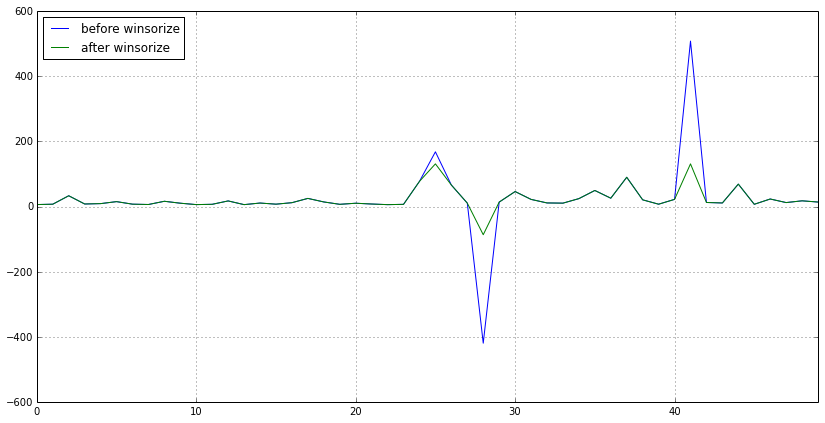

In [ ]:
df.plot(figsize=(14,7))

#### 接下来是中性化函数neutralize
    >  neutralize函数不太好做测试，但是根据neutralize的说明文档，可以猜个大概出来。该函数的定义形式是neutralize(raw_data, target_date, risk_module='short', industry_type='SW1')，可以看到函数需要选择风险模型、行业分类，由此不难推测出，输入原始因子数据，由于原始因子数据是所有行业的，这里可能按照行业分类，对因子进行了行业中性处理（大概可以理解为将因子间的行业差异消除了，比如互联网行业和银行之间的PE本来就不在一个level上，neutralize之后可能就消除了这个因素，有点像对季节数据进行季节平滑处理）

#### 再来看看标准化函数standardize
    >  这个函数应该非常好理解，也非常好测试，很多券商的研究报告都有提到过该处理方法，简单来讲就是（因子值 - 因子均值）/ 因子标准差，下面接前面的例子对standardize进行测试

In [ ]:
data1 = standardize(data)
df1 = pd.DataFrame(data=0, index=map(lambda x: x[:6], universe), columns=['raw data','standardize function','standardize myself'])
df1['raw data'][data.keys()] = data.values()  # 原始数据
df1['standardize function'][data1.keys()] = data1.values()  # 通过standardize函数计算的值
df1['standardize myself'] = (df1['raw data'] - df1['raw data'].mean()) / df1['raw data'].std() # 自己计算的值
df1

,raw data,standardize function,standardize myself
600000,5.9624,-0.178463,-0.178463
600104,7.0826,-0.167042,-0.167042
600050,33.0181,0.097395,0.097395
600036,7.7177,-0.160566,-0.160566
600030,8.8612,-0.148907,-0.148907
600028,14.9741,-0.086580,-0.086580
600016,7.1609,-0.166243,-0.166243
600015,6.1384,-0.176669,-0.176669
600519,16.0515,-0.075595,-0.075595
601006,10.1080,-0.136195,-0.136195


可以看到，猜测完全正确，得到的结果一模一样！！

#### 好了，三个因子处理函数已经猜完了，再来看看大头吧，组合构建函数simple_long_only，同样，结合帮助文档来看。
    >  在《量化分析师日记》中对该函数的说明是：“组合构建综合考虑各因子大小，行业配置等因素，默认返回前30%的股票”。给我的直观理解是，倘若给定100个股票，那么函数就根据股票的因子值以及行业分类选出其中最好的30%只股票，也就是30只股票以及他们各自的建仓权重。至于内部怎么实现的，我也只能猜测，估计选出来的30只股票行业配置要比较均匀，而且要因子值要优于没有被选中的股票，比如我要选低估值的股票，那么就优先选择低PE的，但是又不能直接选PE排名30%以下的那30只股票，因为还要考虑到行业配置均匀的问题，不然选出来的很可能都是同一个行业的（比如银行、钢铁之类的），所以，个人猜测组合构建函数就是在因子值和行业配置均匀之间进行博弈，求得一个最优组合。。。下面，还是写出猜想过程。

In [ ]:
factor = standardize(neutralize(winsorize(data),'20150916'))   #  将原始数据进行处理，得到最终因子值
weight = simple_long_only(factor, '20150915')  # 根据因子构建组合，获得权重
df_factor = pd.DataFrame(data=np.nan, index=map(lambda x: x[:6], universe), columns=['factor','weight'])  # 将因子值和最后的持仓权重对比
df_factor['factor'][factor.keys()] = factor.values()
df_factor['weight'][weight.keys()] = weight.values()
df_factor

,factor,weight
600000,-3.236122e-01,NaN
600104,-7.364325e-15,NaN
600050,3.671396e-15,0.015365
600036,7.982552e-01,0.084137
600030,-3.042384e-01,NaN
600028,-2.572782e-01,NaN
600016,-1.811580e-01,NaN
600015,-2.869542e-01,NaN
600519,4.488652e-01,0.044730
601006,-3.457882e-02,NaN


#### 从上面的对比可以看到：
- 总共50只股票，最后只选取了19只，比较接近30%的比例，证明了之前的猜测
- 由于我们假设的是要买高PE的，所以可以看到，最后选出的19只股票的因子值（PE）相对没有选中的都比较高，而且绝大多数权重都和因子值呈比例出现，至于没有呈现比例的应该是基于行业配置均匀的考虑，所以说之前的猜想还是非常靠谱的，有兴趣的读者可以自行进一步研究。

同样，也给出对比分析图

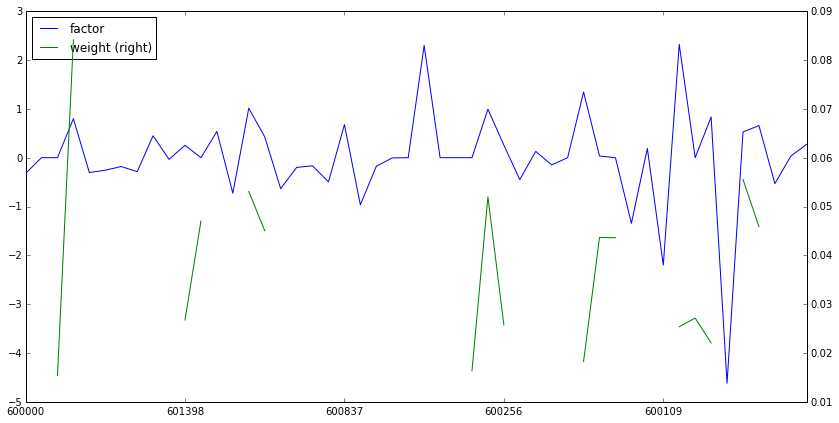

In [ ]:
df_factor.plot(secondary_y='weight',figsize=(14,7))

### 终于写到最后一部分，内心是无比的纠结。。

-  有了因子处理以及组合构建之后，我们就可以自己找因子来构建组合了，大赛方还专门有获取因子数据的DataAPI，真心赞一个！

-  那么，我就要开始分享我的策略了。。。优矿工作人员看到的话一定要给我**`加内存，或者什么VIP账号`**啊啊啊！！！

-  策略思路来源就是经典的Fama-French三因子模型，三因子模型告诉我们，股票的收益可以由这三个因子来解释：市场beta、股票市值、股票估值；同时，低估值、低市值的股票能够获得超额收益

-  那么，估值可以用市盈率来衡量(PE)，市值可以用流通市值来衡量（LFLO），下面就给出策略回测效果

PS：回测区间从2012年8月1日~2015年8月1日，股票池为中证800，每月第一个交易日建仓

### 接下来，用组合累计收益减去基准累计收益就得到alpha收益，如下所示：

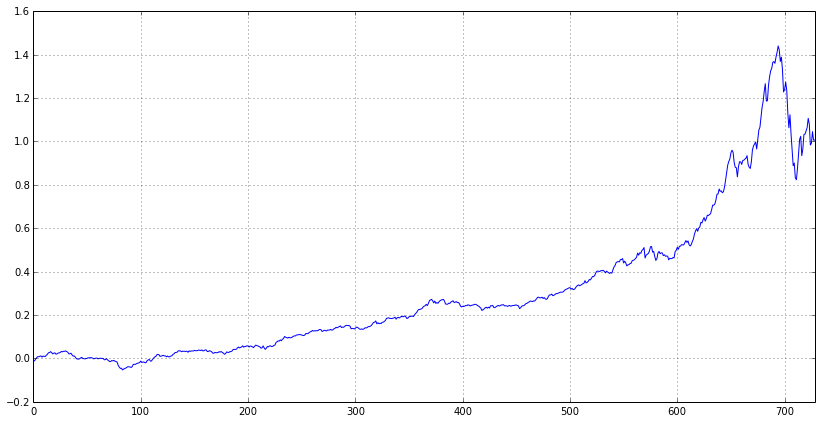

In [ ]:
((bt['portfolio_value']/bt['portfolio_value'][0] - 1) - ((1 + bt['benchmark_return']).cumprod() - 1)).plot(figsize=(14,7))

可以看到，将Fama-French三因子运用到中国市场，可以得到非常稳健的Alpha收益！

#### 写在最后面：
   重要的事情说三遍，希望可以**`给点内存，给点内存，给点内存`**。。我是不是太直接了？？？欢迎交流~~~